### **Airline Scheduling Problem using hill climbing**

## City Allocator

This part initializes 10 cities randomly.
In the City class:
1. expected_passengers is the passengers that a company can pick up from each city.
2. fuel_cost_per_liter is the rate or cost of fuel per liter in each city.
3. x and y are the coordinates of the city on the grid

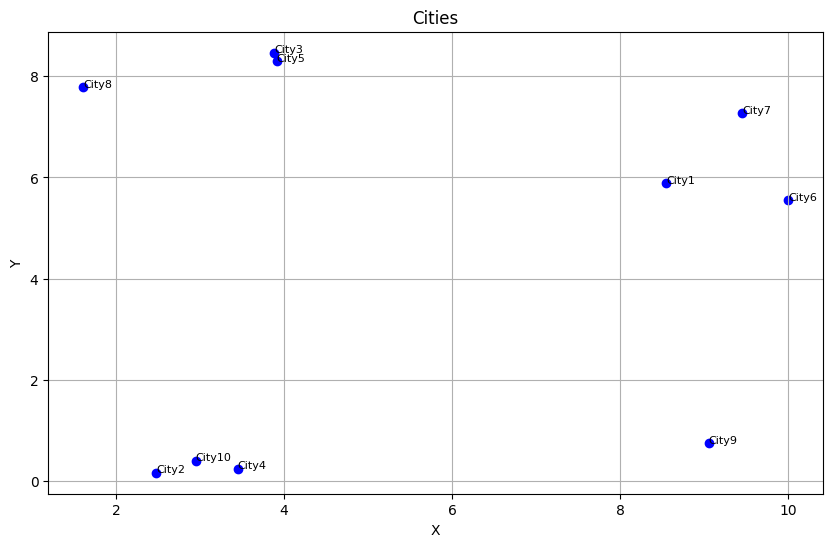

In [90]:
import random
import matplotlib.pyplot as plt

class City:
    def __init__(self, name, expected_passengers, fuel_cost_per_liter, x, y):
        self.name = name
        self.expected_passengers = expected_passengers
        self.fuel_cost_per_liter = fuel_cost_per_liter
        self.x = x
        self.y = y

def generate_random_expected_passengers(companies):
    expected_passengers = {}
    for company in companies:
        expected_passengers[company] = random.randint(50, 300)  # Random number of passengers between 50 and 300
    return expected_passengers

# Initialize companies
companies = ["Company1", "Company2", "Company3", "Company4", "Company5"]

# Initialize cities
cities = []
for i in range(10):
    city_name = f"City{i+1}"
    expected_passengers = generate_random_expected_passengers(companies)
    fuel_cost_per_liter = random.uniform(1, 2)  # Random fuel cost per liter between $1 and $2
    x = random.uniform(0, 10)  # Random x-coordinate
    y = random.uniform(0, 10)  # Random y-coordinate
    cities.append(City(city_name, expected_passengers, fuel_cost_per_liter, x, y))

# Plot cities on a graph
plt.figure(figsize=(10, 6))
for city in cities:
    plt.scatter(city.x, city.y, color='blue')
    plt.text(city.x, city.y, city.name, fontsize=8)

plt.title('Cities')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [91]:
for city in cities:
  print(city.name,'\t',city.fuel_cost_per_liter,'\t',city.expected_passengers)

City1 	 1.32821741687294 	 {'Company1': 55, 'Company2': 203, 'Company3': 86, 'Company4': 123, 'Company5': 211}
City2 	 1.196882758279095 	 {'Company1': 180, 'Company2': 117, 'Company3': 214, 'Company4': 175, 'Company5': 89}
City3 	 1.1158134199350245 	 {'Company1': 240, 'Company2': 52, 'Company3': 180, 'Company4': 223, 'Company5': 92}
City4 	 1.7247590453497388 	 {'Company1': 136, 'Company2': 175, 'Company3': 236, 'Company4': 50, 'Company5': 291}
City5 	 1.5475327649097337 	 {'Company1': 198, 'Company2': 208, 'Company3': 93, 'Company4': 271, 'Company5': 245}
City6 	 1.3703252284720442 	 {'Company1': 289, 'Company2': 203, 'Company3': 147, 'Company4': 156, 'Company5': 136}
City7 	 1.5492910019916313 	 {'Company1': 204, 'Company2': 95, 'Company3': 268, 'Company4': 92, 'Company5': 231}
City8 	 1.0718375036232177 	 {'Company1': 131, 'Company2': 183, 'Company3': 168, 'Company4': 259, 'Company5': 77}
City9 	 1.0516958608803542 	 {'Company1': 190, 'Company2': 247, 'Company3': 246, 'Company4': 

## Flight Table Generator

This part initializes a table containing all possible flights in between all cities for each company.

In the Flight Class:
1. company_name is name of the company to which the flight is related.
2. origin_city is the starting point of the flight.
3. destination_city is the ending point of the flight.
4. travel_time is the flight time in hours.
5. crew_salary is hiring cost of the crew for that flight.
6. fuel_consumption is the liters of fuel consumed for that flight.

In [92]:
import pandas as pd
from tabulate import tabulate

class Flight:
    def __init__(self, company_name, origin_city, destination_city, travel_time, crew_salary, fuel_consumption):
        self.company_name = company_name
        self.origin_city = origin_city
        self.destination_city = destination_city
        self.travel_time = travel_time
        self.crew_salary = crew_salary
        self.fuel_consumption = fuel_consumption

def generate_flights(cities, companies):
    flights = []
    for company in companies:
        for origin in cities:
            for destination in cities:
                if origin != destination:
                    travel_time = round(random.uniform(1, 5), 2)  # Random travel time between 1 and 5 hours
                    crew_salary = random.randint(200, 1000)  # Random crew salary between $200 and $1000
                    fuel_consumption = random.randint(100, 500)  # Random fuel consumption between 100 and 500 liters
                    flight = Flight(company, origin.name, destination.name, travel_time, crew_salary, fuel_consumption)
                    flights.append(flight)
    return flights

# Display flights in a table format
def display_flights_table(flights):
    table_data = []
    for flight in flights:
        row = [flight.company_name, flight.origin_city, flight.destination_city, flight.travel_time, flight.crew_salary, flight.fuel_consumption]
        table_data.append(row)
    headers = ["Company", "Origin City", "Destination City", "Travel Time (hours)", "Crew Salary ($)", "Fuel Consumption (liters)"]
    print(tabulate(table_data, headers=headers))

flights = generate_flights(cities, companies)
display_flights_table(flights)

Company    Origin City    Destination City      Travel Time (hours)    Crew Salary ($)    Fuel Consumption (liters)
---------  -------------  ------------------  ---------------------  -----------------  ---------------------------
Company1   City1          City2                                3.04                664                          228
Company1   City1          City3                                3.73                688                          398
Company1   City1          City4                                2.09                523                          303
Company1   City1          City5                                3.8                 415                          183
Company1   City1          City6                                1.14                392                          224
Company1   City1          City7                                1.06                888                          441
Company1   City1          City8                                1.88     

In [102]:
import random

def calculate_total_cost(schedule):
    total_cost = 0
    for flight in schedule:
        total_cost += flight.crew_salary + flight.fuel_consumption
    return total_cost

def hill_climbing(company_name, flights):
    best_schedules = []
    visited_cities = set()
    current_city = generate_initial_schedule(company_name, flights)
    visited_cities.add(current_city)
    current_cityx=current_city

    for _ in range(50):
        new_schedule, neighboring_cities = generate_neighboring_schedule(company_name, flights, current_city, visited_cities)

        if not new_schedule:
          visited_cities.remove(current_cityx)
          new_schedule, neighboring_cities = generate_neighboring_schedule(company_name, flights, current_city, visited_cities)
          best_schedules.extend(new_schedule)
          break

        best_schedules.extend(new_schedule)
        visited_cities.add(current_city)
        current_city = new_schedule[0].destination_city
    return best_schedules

def generate_initial_schedule(company_name, flights):
    all_cities = set()
    for flight in flights:
        if flight.company_name == company_name:
            all_cities.add(flight.origin_city)
            all_cities.add(flight.destination_city)
    random_city = random.choice(list(all_cities))
    print("INITIAL CITY GENERATED FOR", company_name, "is:", random_city)
    return random_city

def calculate_neighbours_cost(flight):
    return flight.crew_salary + flight.fuel_consumption

def generate_neighboring_schedule(company_name, flights, current_city, visited_cities):
    all_cities = ['City1', 'City2', 'City3', 'City4', 'City5', 'City6', 'City7', 'City8', 'City9', 'City10']
    neighboring_cities = [city for city in all_cities if city != current_city and city not in visited_cities]

    # If all cities are visited, return an empty list
    if not neighboring_cities:
        return [], []

    company_flights = [flight for flight in flights if flight.company_name == company_name
                       and flight.origin_city == current_city
                       and flight.destination_city in neighboring_cities]
    random.shuffle(company_flights)

    company_flights.sort(key=calculate_neighbours_cost)

    return company_flights[:1], neighboring_cities

best_schedules = {}  # Initialize an empty dictionary to store the best schedules

for company_name in companies:
    # Call the hill_climbing function for the current company and append the result to best_schedules dictionary
    best_schedules[company_name] = hill_climbing(company_name, flights)


INITIAL CITY GENERATED FOR Company1 is: City6
INITIAL CITY GENERATED FOR Company2 is: City1
INITIAL CITY GENERATED FOR Company3 is: City1
INITIAL CITY GENERATED FOR Company4 is: City8
INITIAL CITY GENERATED FOR Company5 is: City5


In [103]:
def display_company_flights(data, company_name):
    if company_name not in data:
        print("No flights available for this company")
        return

    print("\n" + company_name + "\n---------")
    flights = data[company_name]
    if flights:
        display_flights_table(flights)
        print("---------\n")
    else:
        print("No flights available for this company")

for company_name in companies:
  display_company_flights(best_schedules, company_name)



Company1
---------
Company    Origin City    Destination City      Travel Time (hours)    Crew Salary ($)    Fuel Consumption (liters)
---------  -------------  ------------------  ---------------------  -----------------  ---------------------------
Company1   City6          City2                                2.67                335                          258
Company1   City2          City1                                1.78                210                          124
Company1   City1          City8                                1.88                243                          332
Company1   City8          City9                                2.07                313                          243
Company1   City9          City7                                4.33                256                          234
Company1   City7          City3                                3.46                326                          449
Company1   City3          City4                     

<ipython-input-106-997e9ba1b390>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('hsv', len(best_schedules) + 1)


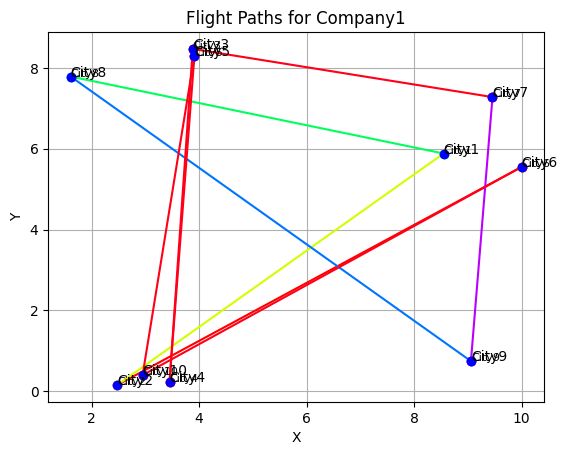

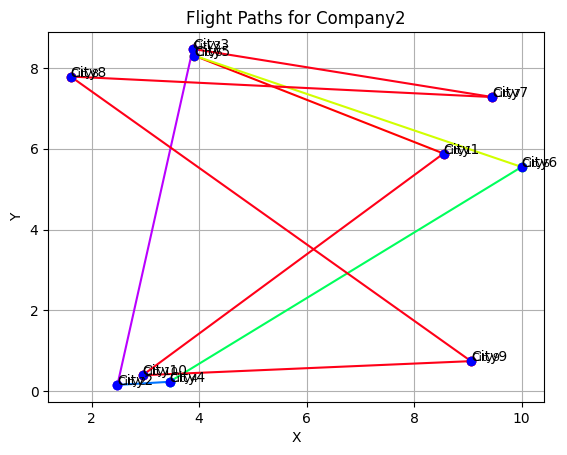

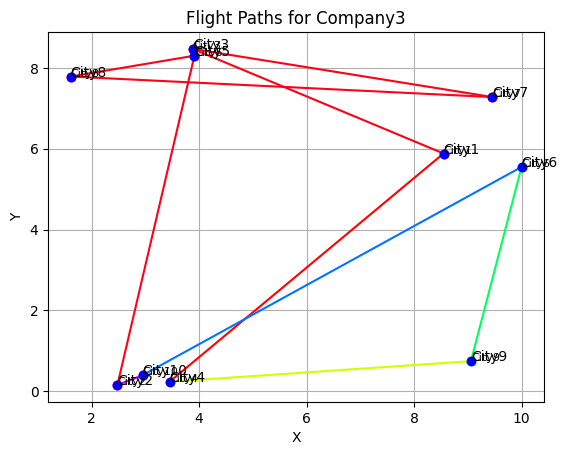

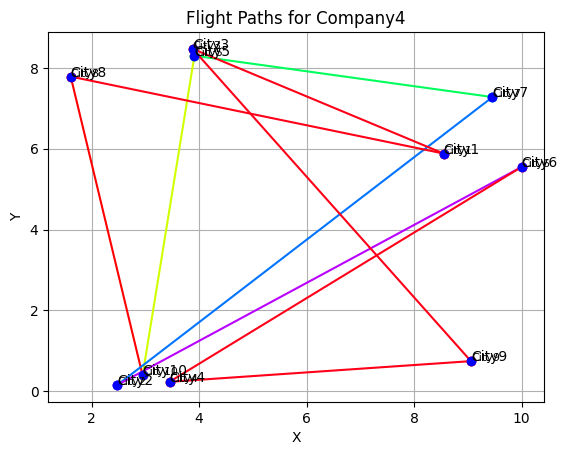

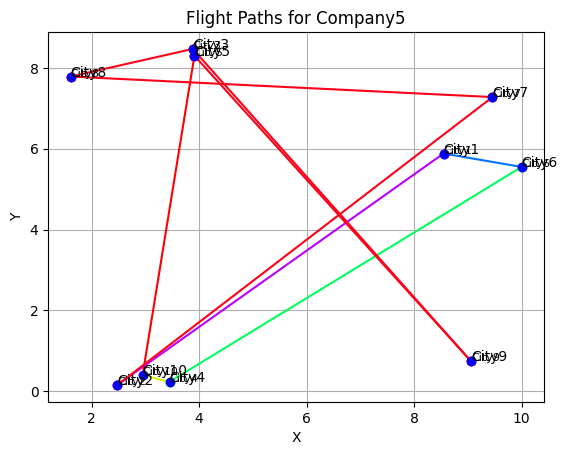

In [106]:
import matplotlib.pyplot as plt

def plot_flight_paths(best_schedules, cities, company_name):
    if company_name not in best_schedules:
        print(f"No best schedules available for {company_name}.")
        return

    city_coordinates = {city.name: (city.x, city.y) for city in cities}
    color_map = plt.cm.get_cmap('hsv', len(best_schedules) + 1)

    schedule = best_schedules[company_name]
    for i, flight in enumerate(schedule):
        origin_coords = city_coordinates[flight.origin_city]
        dest_coords = city_coordinates[flight.destination_city]
        plt.plot([origin_coords[0], dest_coords[0]], [origin_coords[1], dest_coords[1]], color=color_map(i), linestyle='-', marker='o')
        plt.text(dest_coords[0], dest_coords[1], flight.destination_city)

    for city_name, (x, y) in city_coordinates.items():
        plt.plot(x, y, 'bo')
        plt.text(x, y, city_name, fontsize=8)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Flight Paths for {company_name}')
    plt.grid(True)
    plt.show()

for company in companies:
    plot_flight_paths(best_schedules, cities, company)
